<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Instruction" data-toc-modified-id="Instruction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Instruction</a></span></li><li><span><a href="#Submision" data-toc-modified-id="Submision-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Submision</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Data-stats" data-toc-modified-id="Data-stats-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data stats</a></span></li><li><span><a href="#Data-transforms" data-toc-modified-id="Data-transforms-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Data transforms</a></span></li><li><span><a href="#Model-estimation" data-toc-modified-id="Model-estimation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model estimation</a></span></li><li><span><a href="#Model-to-Pickle" data-toc-modified-id="Model-to-Pickle-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model to Pickle</a></span></li></ul></li></ul></div>

## Homework

### Intro

It's midterm season! For this assignment, you can either do it yourself or pick 1-3 partners from this course, find them in the discord channel. Together, you're going to build an MVP for an AI startup prototype. This will be a web app built using either Node.Js or Flask. We'll save mobile app development for the final. Pick an industry (i.e Finance, Medicine, Agriculture, etc.) and decide on a service you can provide to others using machine learning. Train a model on a dataset, create a web-app interface to serve it to users, and host the web app on a hosting service of your choice (i.e AWS, Google Cloud, Heroku, etc.).

### Instruction

1. Pick a partner in the discord channel to work with you.

2. Together, decide what your MVP startup prototype service will be. (I.e classification service for doctors, supply chain tool for retailers, etc.)

3. List out the steps needed to build the prototype, split those tasks evenly among you both. Create a shared GitHub repository where you both have commit access. This is practice in communication and shared work.

4. Your web app has 3 criteria - it should use machine learning in some way, have user login/signup functionality, and it should have a pay-to-access portion using any payment service (i.e Stripe, Braintree, paypal, etc.). You can make it a freemium model or have only paid access.

### Submision

Submit your github link to gradedhomeworkassignments@gmail.com with "Midterm" as the title of your email. The deadline is 2 weeks from assignment. Only 1 submission per team, decide who will submit it. Good luck! I'm expecting some of these projects to turn into businesses

## References

fastai  wiele różnych app fastai-v3

render.com for app deployment on servers

anfederico/flaskex

clearbit - 

stripe or paypal 


## Model

The flight delays data is used from Kaggle competition:
https://www.kaggle.com/usdot/flight-delays

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

pd.options.display.max_columns = None

%run ./var_mem_usage_reduction.py

### Data load

In [2]:
%%time

#data files should be in jupyter notebook directory
data_id = pd.read_csv('D:/04_Jupyter/HW_05/data_flights/flights.csv', low_memory=False)
print('flights.csv :')
data_id=reduce_variable_mem_usage(data_id)

flights.csv :
Memory usage of dataframe is 1376.28 MB
Memory usage after optimization is: 305.47 MB
Decreased by 77.8%
Wall time: 24.2 s


In [3]:
data_airports = pd.read_csv('D:/04_Jupyter/HW_05/data_flights/airports.csv')

In [4]:
data_airports_list = pd.read_csv('D:/04_Jupyter/HW_05/data_flights/airports_list.csv')

In [5]:
data_airlines_list = pd.read_csv('D:/04_Jupyter/HW_05/data_flights/airlines_list.csv')

In [6]:
data_tmp=data_id.copy()

### Data stats

In [7]:
data_id_cnt=pd.DataFrame({   'alias' :data_id.columns.tolist(), 
                          'cnt_unq' :list(data_id.nunique()), 
                          'pct_unq' :(data_id.nunique()/data_id.shape[0]*100).round(4), 
                          'cnt_nan' :data_id.isna().sum(),
                          'pct_nan' :(data_id.isna().sum()/data_id.shape[0]*100).round(4)
                      }).reset_index(drop=True).drop(0)
data_id_cnt

,alias,cnt_unq,pct_unq,cnt_nan,pct_nan
1,MONTH,12,0.0002,0,0.0000
2,DAY,31,0.0005,0,0.0000
3,DAY_OF_WEEK,7,0.0001,0,0.0000
4,AIRLINE,14,0.0002,0,0.0000
5,FLIGHT_NUMBER,6952,0.1195,0,0.0000
6,TAIL_NUMBER,4897,0.0842,14721,0.2530
7,ORIGIN_AIRPORT,628,0.0108,0,0.0000
8,DESTINATION_AIRPORT,629,0.0108,0,0.0000
9,SCHEDULED_DEPARTURE,1321,0.0227,0,0.0000
10,DEPARTURE_TIME,1348,0.0232,86153,1.4805


In [8]:
data_id.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_id[data_id.ARRIVAL_DELAY>15].shape

(1023498, 31)

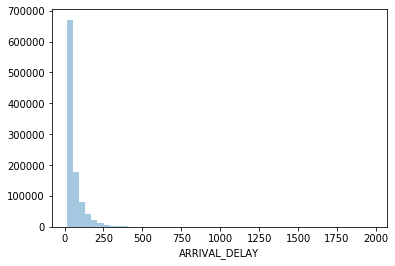

In [10]:
plot=sns.distplot(data_id[data_id.ARRIVAL_DELAY>15].ARRIVAL_DELAY,bins=50, kde=False)

### Data transforms

In [11]:
#############
data_id=data_tmp.copy()

In [12]:
data_id['DELAY_IND']=0
data_id.DELAY_IND.value_counts()

0    5819079
Name: DELAY_IND, dtype: int64

In [13]:
# defining delay indicator with delay more than 15 minutes
data_id.DELAY_IND.loc[data_id.ARRIVAL_DELAY>15]=1
data_id.DELAY_IND.value_counts()

D:\03_WinPy\python-3.7.4.amd64\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    4795581
1    1023498
Name: DELAY_IND, dtype: int64

In [14]:
data_id['SEASON']=1 #winter

In [16]:
data_id.SEASON.loc[data_id.MONTH>=4]=2
data_id.SEASON.loc[data_id.MONTH>=7]=3
data_id.SEASON.loc[data_id.MONTH>=10]=4
data_id.SEASON.value_counts()

3    1496200
2    1486041
4    1433367
1    1403471
Name: SEASON, dtype: int64

In [17]:
data_id.SEASON.loc[(data_id.SEASON==1) & (data_id.MONTH==3) & (data_id.DAY>21)]=2
data_id.SEASON.value_counts()

2    1650021
3    1496200
4    1433367
1    1239491
Name: SEASON, dtype: int64

In [18]:
data_id.SEASON.loc[(data_id.SEASON==2) & (data_id.MONTH==6) & (data_id.DAY>21)]=3
data_id.SEASON.value_counts()

3    1648045
2    1498176
4    1433367
1    1239491
Name: SEASON, dtype: int64

In [19]:
data_id.SEASON.loc[(data_id.SEASON==3) & (data_id.MONTH==9) & (data_id.DAY>22)]=4
data_id.SEASON.value_counts()

4    1559583
3    1521829
2    1498176
1    1239491
Name: SEASON, dtype: int64

In [20]:
data_id.SEASON.loc[(data_id.SEASON==4) & (data_id.MONTH==12) & (data_id.DAY>21)]=1
print(data_id.SEASON.value_counts())

3    1521829
2    1498176
4    1407184
1    1391890
Name: SEASON, dtype: int64


In [21]:
data_id['TimeOfDay']=0 #forenoon

In [22]:
data_id.TimeOfDay.loc[(data_id.SCHEDULED_DEPARTURE>=1200)]=1 #afternoon
print(data_id.TimeOfDay.value_counts())

1    3415450
0    2403629
Name: TimeOfDay, dtype: int64


In [25]:
del data_id_shrt,x_all, y_all

In [26]:
data_id_shrt=data_id.loc[data_id.ORIGIN_AIRPORT.str.len()==3,['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE','DAY_OF_WEEK','SEASON','TimeOfDay','DELAY_IND']]
data_id_shrt.dropna(inplace=True)

x_all=data_id_shrt.loc[:,['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE','DAY_OF_WEEK','SEASON','TimeOfDay']]
y_all=data_id_shrt.loc[:,['DELAY_IND']]

In [27]:
x_all.head(10)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,DAY_OF_WEEK,SEASON,TimeOfDay
0,ANC,SEA,AS,4,1,0
1,LAX,PBI,AA,4,1,0
2,SFO,CLT,US,4,1,0
3,LAX,MIA,AA,4,1,0
4,SEA,ANC,AS,4,1,0
5,SFO,MSP,DL,4,1,0
6,LAS,MSP,NK,4,1,0
7,LAX,CLT,US,4,1,0
8,SFO,DFW,AA,4,1,0
9,LAS,ATL,DL,4,1,0


In [28]:
data_airports_list_tmp=data_airports_list.copy()
display(data_airports_list_tmp.head(1))
data_airlines_list_tmp=data_airlines_list.copy()
display(data_airlines_list_tmp.head(1))

,airport,IATA_CDE,cde_id
0,Aberdeen - Aberdeen Regional Airport,ABR,1


,IATA_CODE,airport,code_id
0,UA,United Air Lines Inc.,1


In [29]:
data_airports_list=data_airports_list_tmp.copy()
data_airports_list.drop(columns=['airport'],inplace=True)
data_airports_list.set_index('IATA_CDE', inplace=True, drop=True )
data_airports_list.head(10)

,cde_id
IATA_CDE,
ABR,1
ABI,2
ADK,3
GUM,4
BQN,5
CAK,6
ALB,7
ABY,8
ABQ,9


In [30]:
data_airlines_list=data_airlines_list_tmp.copy()
data_airlines_list.drop(columns=['airport'],inplace=True)
data_airlines_list.set_index('IATA_CODE', inplace=True, drop=True )
data_airlines_list.head(10)

,code_id
IATA_CODE,
UA,1
AA,2
US,3
F9,4
B6,5
OO,6
AS,7
NK,8
WN,9


In [31]:
x_all=x_all.join(data_airports_list, on='ORIGIN_AIRPORT')
x_all.rename(columns={'cde_id': 'origin_cde'},inplace=True)
x_all=x_all.join(data_airports_list, on='DESTINATION_AIRPORT')
x_all.rename(columns={'cde_id': 'dest_cde'},inplace=True)
x_all=x_all.join(data_airlines_list, on='AIRLINE')
x_all.rename(columns={'code_id': 'airline_cde'},inplace=True)
x_all.head(100)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIRLINE,DAY_OF_WEEK,SEASON,TimeOfDay,origin_cde,dest_cde,airline_cde
0,ANC,SEA,AS,4,1,0,14,279,7
1,LAX,PBI,AA,4,1,0,182,309,2
2,SFO,CLT,US,4,1,0,268,56,3
3,LAX,MIA,AA,4,1,0,182,196,2
4,SEA,ANC,AS,4,1,0,279,14,7
5,SFO,MSP,DL,4,1,0,268,199,10
6,LAS,MSP,NK,4,1,0,172,199,8
7,LAX,CLT,US,4,1,0,182,56,3
8,SFO,DFW,AA,4,1,0,268,77,2
9,LAS,ATL,DL,4,1,0,172,20,10


In [32]:
x_all.drop(columns=['ORIGIN_AIRPORT'],inplace=True)
x_all.drop(columns=['DESTINATION_AIRPORT'],inplace=True)
x_all.drop(columns=['AIRLINE'],inplace=True)
x_all.head(10)

,DAY_OF_WEEK,SEASON,TimeOfDay,origin_cde,dest_cde,airline_cde
0,4,1,0,14,279,7
1,4,1,0,182,309,2
2,4,1,0,268,56,3
3,4,1,0,182,196,2
4,4,1,0,279,14,7
5,4,1,0,268,199,10
6,4,1,0,172,199,8
7,4,1,0,182,56,3
8,4,1,0,268,77,2
9,4,1,0,172,20,10


In [33]:
%%time
x_all = pd.concat([x_all,pd.get_dummies(x_all['origin_cde'],drop_first=True,prefix='org')],axis=1)
x_all = pd.concat([x_all,pd.get_dummies(x_all['dest_cde'],drop_first=True,prefix='dst')],axis=1)
x_all = pd.concat([x_all,pd.get_dummies(x_all['airline_cde'],drop_first=True,prefix='arl')],axis=1)
x_all = pd.concat([x_all,pd.get_dummies(x_all['SEASON'],drop_first=True,prefix='ssn')],axis=1)
x_all = pd.concat([x_all,pd.get_dummies(x_all['DAY_OF_WEEK'],drop_first=True,prefix='dow')],axis=1)

Wall time: 43.1 s


In [34]:
x_all.drop(['origin_cde','dest_cde','airline_cde','SEASON','DAY_OF_WEEK'],axis=1,inplace=True)
x_all.shape

(5332914, 665)

### Model estimation

In [35]:
X_train, x_test, Y_train, y_test = train_test_split(x_all, y_all, test_size=0.8, random_state=100)
X_test, X_val, Y_test, Y_val = train_test_split(x_test, y_test, test_size=0.8, random_state=100)

In [37]:
del x_all, y_all

In [36]:
del  X_val, Y_val

In [39]:
del x_test, y_test

In [38]:
%%time
#logreg = LogisticRegression(solver='saga', C=0.9 ,random_state=100)  
logreg = LogisticRegression(solver='lbfgs', random_state=100, max_iter=1000, C=0.7)  
# solver 'sag' and 'saga' quicker for large datasets
logreg.fit(X_train, np.ravel(Y_train.to_numpy()))

Wall time: 2min 21s


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    699085
           1       0.41      0.00      0.00    154181

    accuracy                           0.82    853266
   macro avg       0.61      0.50      0.45    853266
weighted avg       0.74      0.82      0.74    853266



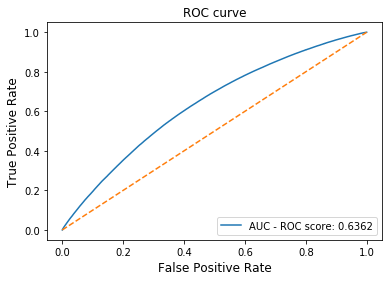

In [40]:
Y_scores=logreg.decision_function(X_test)
Y_predicted=logreg.predict(X_test)

fpr, tpr, _ = roc_curve(Y_test, Y_scores)
plt.plot(fpr, tpr, label='AUC - ROC score: %.4f' % roc_auc_score(Y_test, Y_scores))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')

print(classification_report(Y_test, Y_predicted))

### Model to Pickle

In [53]:
import pickle

with open('logreg_flights.pkl', 'wb') as fid:
    pickle.dump(logreg, fid,2)  

with open('dict_airports.pkl', 'wb') as fid:
    pickle.dump(data_airports_list_tmp, fid,2)  
    
with open('dict_airlines.pkl', 'wb') as fid:
    pickle.dump(data_airlines_list_tmp, fid,2)  
    
index_dict = dict(zip(X_train.columns,range(X_train.shape[1])))

with open('dict_cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  